In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
data = pd.read_csv("Data.csv")
data.head()

,Provinsi,Negara/Wilayah,Terakhir Update,Dikonfirmasi,Kematian,Yang sudah Pulih
0,Odisha,India,28/02/2021 05.22,337104,1915,334519
1,Ohio,US,28/02/2021 05.22,966154,17237,0
2,Oita,Japan,28/02/2021 05.22,1291,21,1230
3,Okayama,Japan,28/02/2021 05.22,2479,32,2389
4,Okinawa,Japan,28/02/2021 05.22,8206,120,7774


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Provinsi          217 non-null    object
 1   Negara/Wilayah    217 non-null    object
 2   Terakhir Update   217 non-null    object
 3   Dikonfirmasi      217 non-null    int64 
 4   Kematian          217 non-null    int64 
 5   Yang sudah Pulih  217 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.3+ KB


In [42]:
data['Terakhir Update'].unique()

array(['28/02/2021 05.22'], dtype=object)

In [43]:
latest_date = '28/02/2021 05.22'
data[data['Terakhir Update']==latest_date]

,Provinsi,Negara/Wilayah,Terakhir Update,Dikonfirmasi,Kematian,Yang sudah Pulih
0,Odisha,India,28/02/2021 05.22,337104,1915,334519
1,Ohio,US,28/02/2021 05.22,966154,17237,0
2,Oita,Japan,28/02/2021 05.22,1291,21,1230
3,Okayama,Japan,28/02/2021 05.22,2479,32,2389
4,Okinawa,Japan,28/02/2021 05.22,8206,120,7774
...,...,...,...,...,...,...
212,Zaporizhia Oblast,Ukraine,28/02/2021 05.22,69504,1132,65049
213,Zeeland,Netherlands,28/02/2021 05.22,16480,178,0
214,Zhejiang,Mainland China,28/02/2021 05.22,1321,1,1314
215,Zhytomyr Oblast,Ukraine,28/02/2021 05.22,50582,834,44309


In [44]:
unique_countries = data[data.Dikonfirmasi>0]['Negara/Wilayah'].unique()
unique_countries.sort()
unique_countries

array(['Australia', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia',
       'France', 'Germany', 'India', 'Italy', 'Japan', 'Mainland China',
       'Mexico', 'Netherlands', 'Pakistan', 'Peru', 'Russia', 'Spain',
       'Sweden', 'UK', 'US', 'Ukraine'], dtype=object)

In [45]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.Dikonfirmasi>0][data['Negara/Wilayah']==i][data['Terakhir Update']==latest_date].Dikonfirmasi.sum())

<ipython-input-45-cde4b410c123>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Dikonfirmasi>0][data['Negara/Wilayah']==i][data['Terakhir Update']==latest_date].Dikonfirmasi.sum())


In [46]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Mainland China', 7254), ('US', 8858500), ('France', 14566), ('Russia', 1586000), ('Mexico', 547740), ('Brazil', 6285616), ('Ukraine', 432930), ('Australia', 23570), ('Italy', 1213150), ('Colombia', 462870), ('Japan', 219753), ('Chile', 74604), ('Spain', 150674), ('UK', 406993), ('India', 3343406), ('Belgium', 112882), ('Pakistan', 429353), ('Peru', 174162), ('Germany', 506065), ('Sweden', 516034), ('Canada', 620676), ('Netherlands', 437421)}


In [47]:
unique_provinces = data['Provinsi'][data.Dikonfirmasi>1].unique()
unique_provinces

array(['Odisha', 'Ohio', 'Oita', 'Okayama', 'Okinawa', 'Oklahoma',
       'Omsk Oblast', 'Ontario', 'Orebro', 'Oregon', 'Orel Oblast',
       'Orenburg Oblast', 'Osaka', 'Ostergotland', 'Overijssel',
       'P.A. Bolzano', 'P.A. Trento', 'Pais Vasco', 'Para', 'Paraiba',
       'Parana', 'Pasco', 'Pennsylvania', 'Penza Oblast', 'Perm Krai',
       'Pernambuco', 'Piaui', 'Piemonte', 'Piura', 'Poltava Oblast',
       'Port Quarantine', 'Primorsky Krai', 'Prince Edward Island',
       'Pskov Oblast', 'Puducherry', 'Puebla', 'Puerto Rico', 'Puglia',
       'Punjab', 'Puno', 'Putumayo', 'Qinghai', 'Quebec', 'Queensland',
       'Queretaro', 'Quindio', 'Quintana Roo', 'Rajasthan',
       'Repatriated Travellers', 'Reunion', 'Rheinland-Pfalz',
       'Rhode Island', 'Rio Grande do Norte', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Risaralda', 'Rivne Oblast', 'Rondonia',
       'Roraima', 'Rostov Oblast', 'Ryazan Oblast', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Saga', 'Saint Barthe

In [48]:
province_confirmed_case = []
for i in unique_provinces:
  province_confirmed_case.append(data[data.Dikonfirmasi>0][data['Provinsi']==i][data['Terakhir Update']==latest_date].Dikonfirmasi.sum())

<ipython-input-48-42bc70749fc8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Dikonfirmasi>0][data['Provinsi']==i][data['Terakhir Update']==latest_date].Dikonfirmasi.sum())


In [49]:
print(set(zip(unique_provinces, province_confirmed_case)))

{('Roraima', 81776), ('Volyn Oblast', 39901), ('Tumbes', 11520), ('Vologda Oblast', 39097), ('Rheinland-Pfalz', 102006), ('Yucatan', 32702), ('Stockholm', 155151), ('Thuringen', 76291), ('Rhode Island', 125622), ('Rio de Janeiro', 582164), ('Prince Edward Island', 120), ('Saga', 1065), ('Veneto', 332736), ('Saint Helena, Ascension and Tristan da Cunha', 4), ('Saint Barthelemy', 573), ('Zabaykalsky Krai', 38523), ('Zuid-Holland', 255335), ('Utrecht', 86200), ('Saskatchewan', 28506), ('Rajasthan', 320180), ('Saint Pierre and Miquelon', 24), ('Shandong', 869), ('Tabasco', 57324), ('St Martin', 1544), ('Sverdlovsk Oblast', 77513), ('Shanxi', 240), ('Tianjin', 356), ('Walloon Brabant', 29898), ('Puno', 23767), ('Rio Grande do Sul', 638996), ('Risaralda', 46008), ('Shanghai', 1794), ('Tolima', 65123), ('Unknown', 25020), ('Pais Vasco', 150674), ('Tochigi', 4098), ('Oklahoma', 423802), ('Ostergotland', 22855), ('Yamalo-Nenets Autonomous Okrug', 37071), ('Umbria', 44471), ("Valle d'Aosta", 802

In [50]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

In [51]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_confirmed_case)

In [52]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_case.pop(i)

unique_provinces

['Odisha',
 'Ohio',
 'Oita',
 'Okayama',
 'Okinawa',
 'Oklahoma',
 'Omsk Oblast',
 'Ontario',
 'Orebro',
 'Oregon',
 'Orel Oblast',
 'Orenburg Oblast',
 'Osaka',
 'Ostergotland',
 'Overijssel',
 'P.A. Bolzano',
 'P.A. Trento',
 'Pais Vasco',
 'Para',
 'Paraiba',
 'Parana',
 'Pasco',
 'Pennsylvania',
 'Penza Oblast',
 'Perm Krai',
 'Pernambuco',
 'Piaui',
 'Piemonte',
 'Piura',
 'Poltava Oblast',
 'Port Quarantine',
 'Primorsky Krai',
 'Prince Edward Island',
 'Pskov Oblast',
 'Puducherry',
 'Puebla',
 'Puerto Rico',
 'Puglia',
 'Punjab',
 'Puno',
 'Putumayo',
 'Qinghai',
 'Quebec',
 'Queensland',
 'Queretaro',
 'Quindio',
 'Quintana Roo',
 'Rajasthan',
 'Repatriated Travellers',
 'Reunion',
 'Rheinland-Pfalz',
 'Rhode Island',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Risaralda',
 'Rivne Oblast',
 'Rondonia',
 'Roraima',
 'Rostov Oblast',
 'Ryazan Oblast',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Saga',
 'Saint Barthelemy',
 'Saint Helena, Ascension and Tr

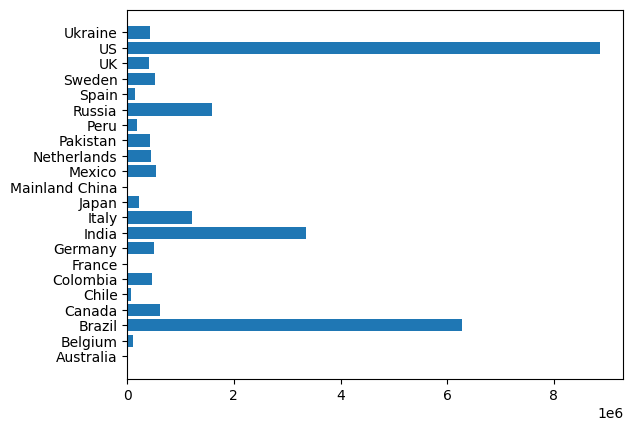

In [53]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()

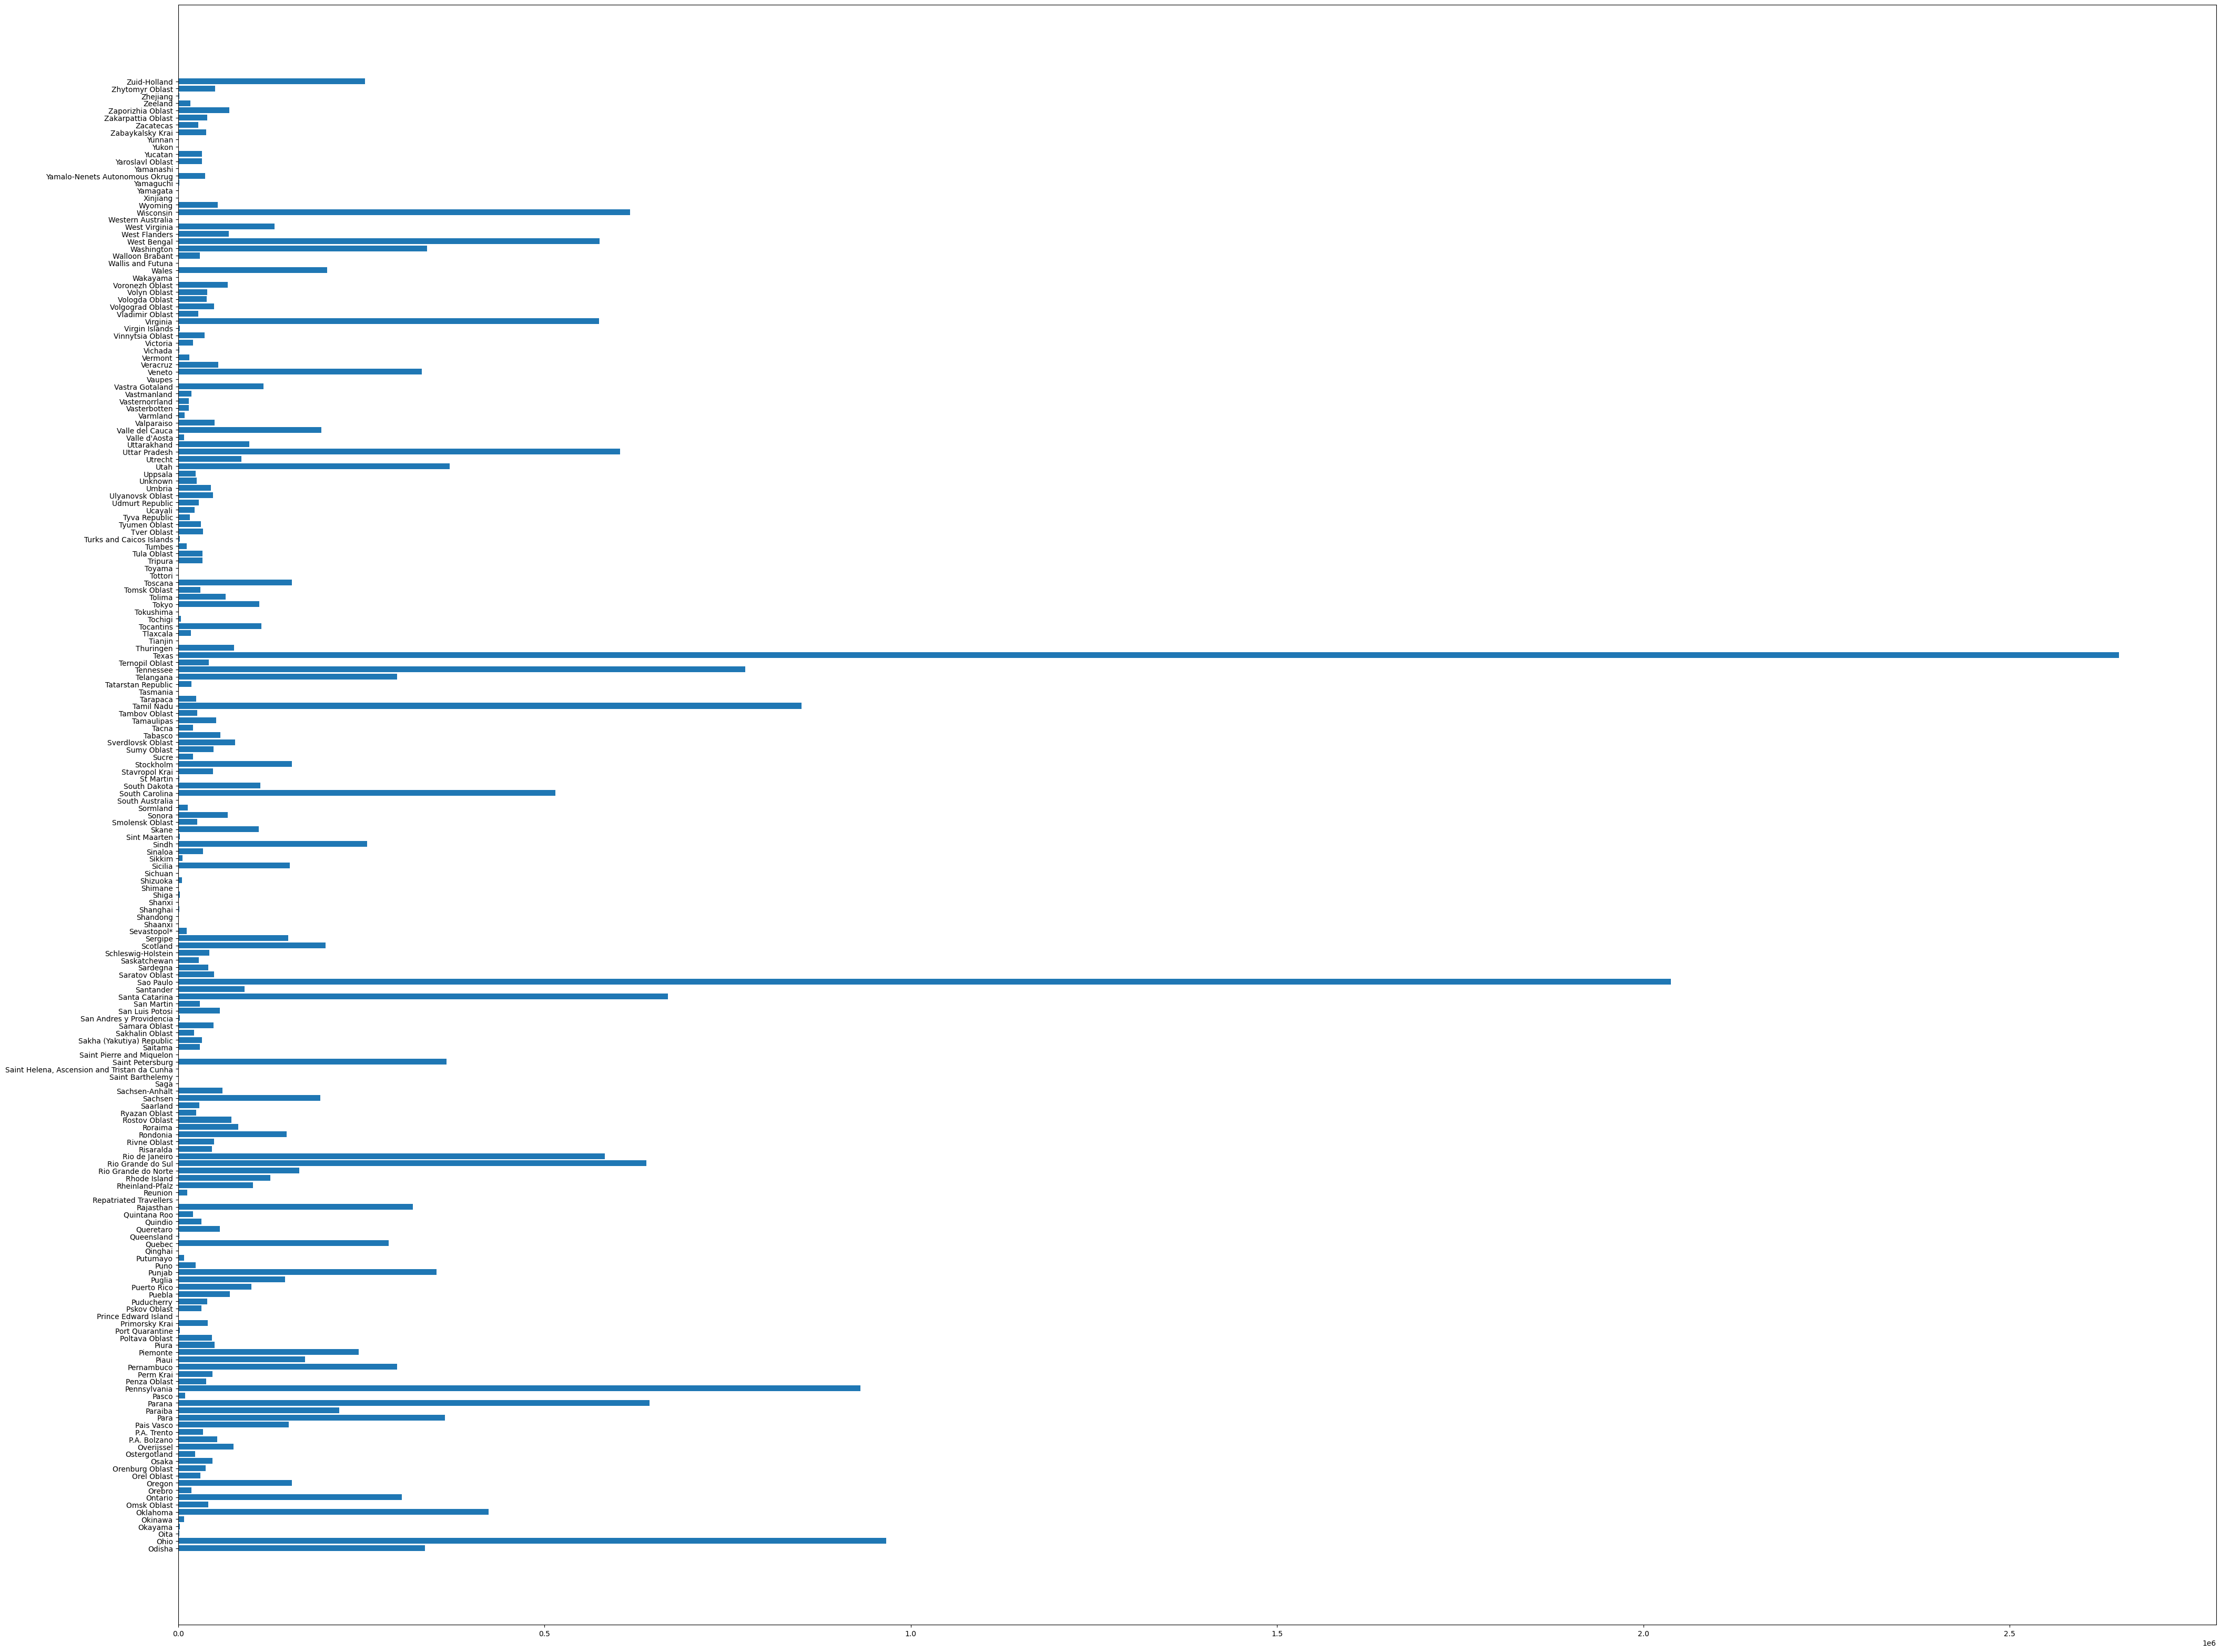

In [54]:
plt.figure(figsize=(50,40))
plt.barh(unique_provinces, province_confirmed_case)
plt.show()

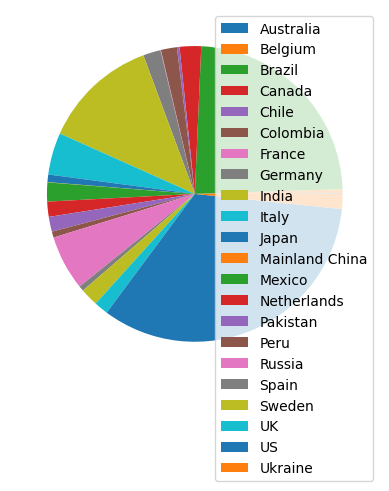

In [55]:
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()

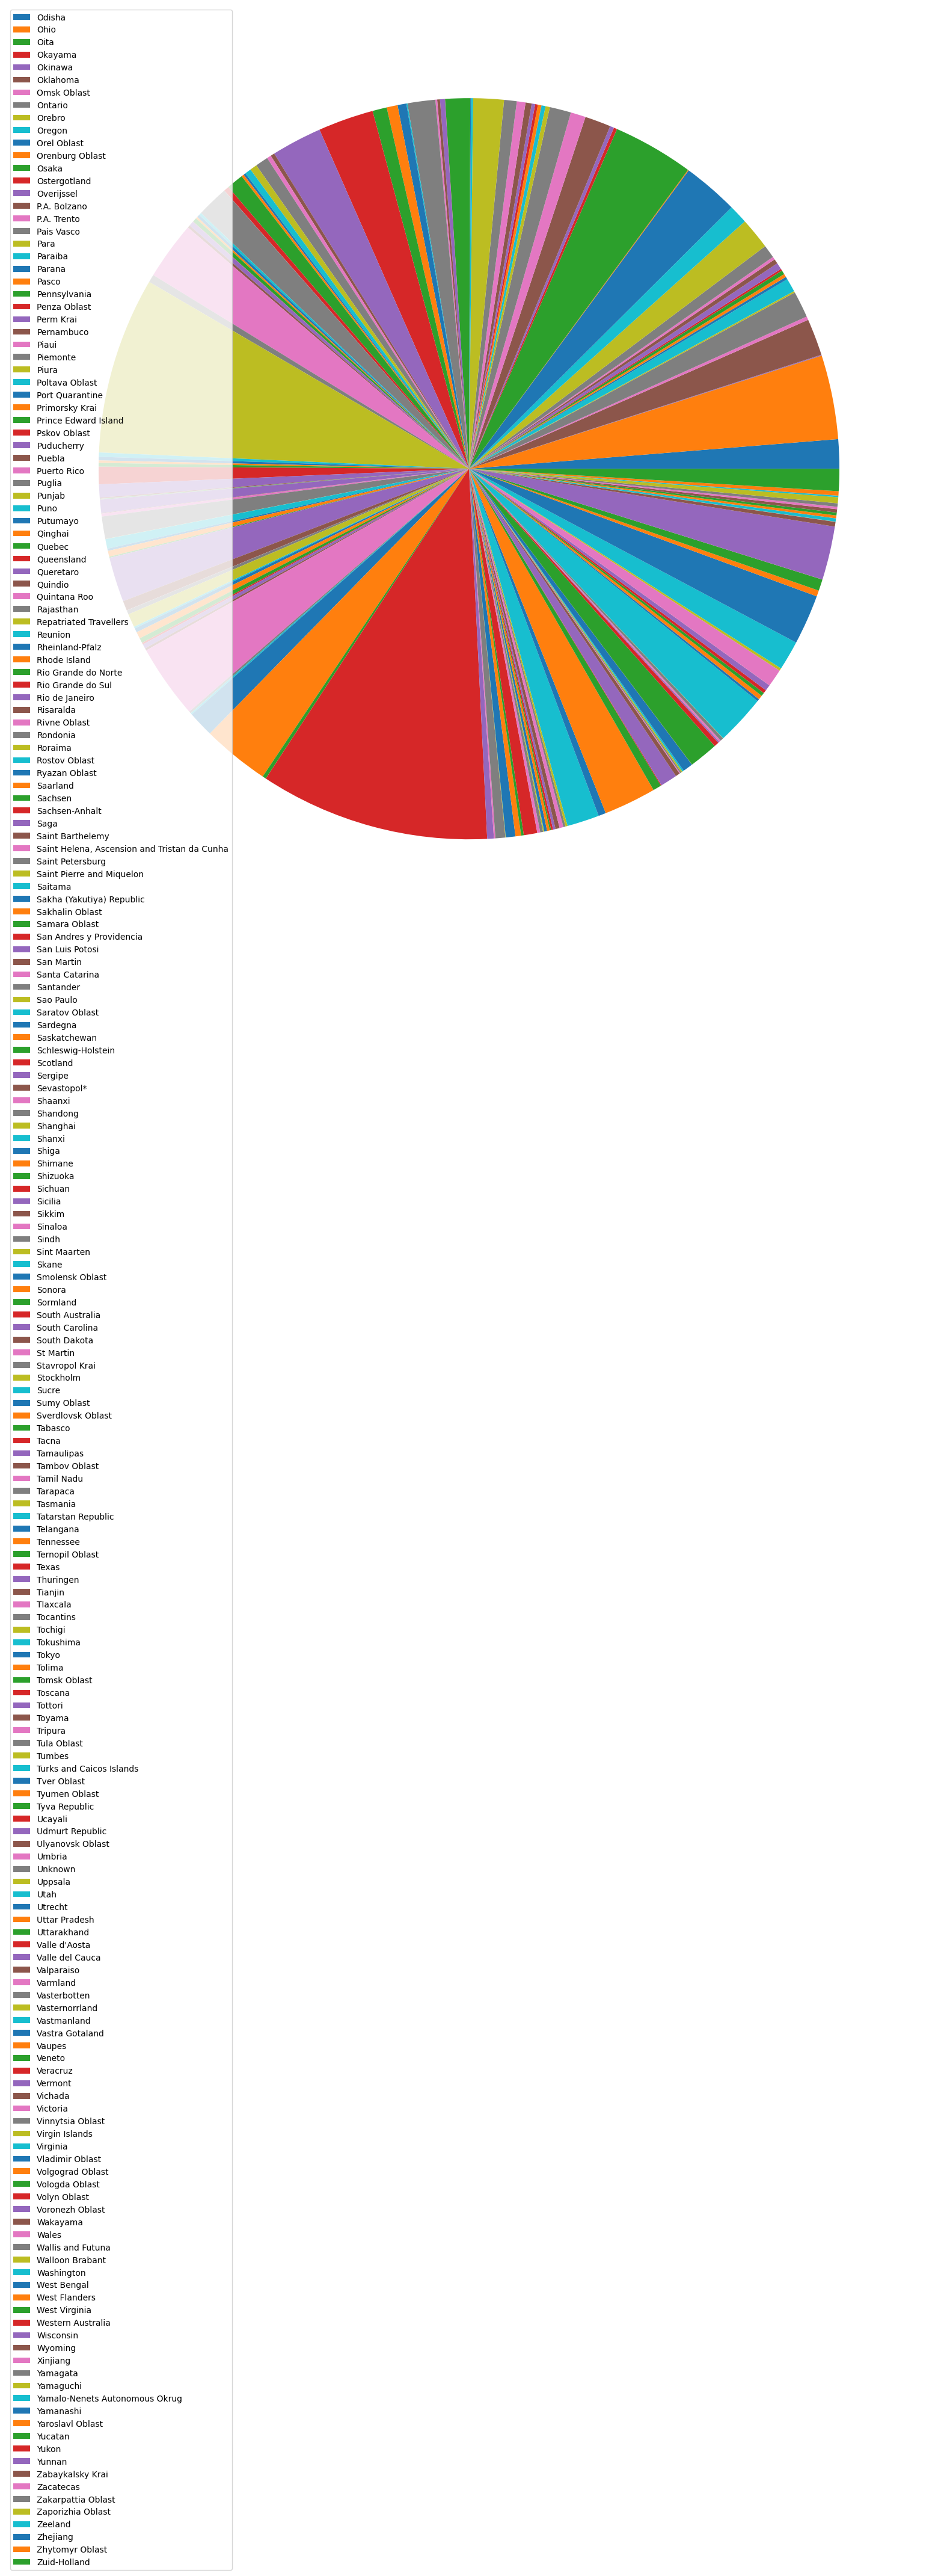

In [56]:
plt.figure(figsize=(20,20))
plt.pie(province_confirmed_case)
plt.legend(unique_provinces, loc='best')
plt.show()